In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Visualize Residual Forecast Errors
Forecast errors on time series regression problems are called residuals or residual errors.

In [7]:
df = pd.read_csv('./dataset/daily-total-female-births.csv', usecols=['Births']).rename(columns={'Births':'t+1'})
df['t'] = df.shift(1)
df.head()

,t+1,t
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [15]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

X = df.values
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print(f'train: {len(train)}, test: {len(test)}')
X_train, y_train = train[:, 1], train[:, 0]
X_test, y_test = test[:, 1], test[:, 0]

train: 92, test: 91
train: 183, test: 91
train: 274, test: 91


In [20]:
# persistence model
predictions = X_test.copy()
predictions[:10]

array([49., 54., 56., 47., 44., 43., 42., 45., 50., 48.])

In [22]:
# calculate residuals
residuals = [y_test[i] - predictions[i] for i in range(len(predictions))]

## Residual Line Plot

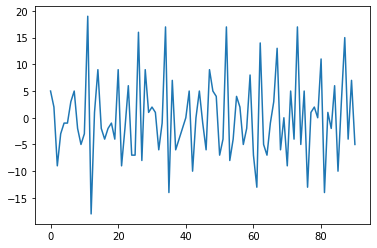

In [23]:
plt.plot(residuals)
plt.show()

## Residual Summary Statistics

In [26]:
residual_df = pd.DataFrame(residuals)
residual_df.describe()

,0
count,91.000000
mean,0.010989
std,7.681861
min,-18.000000
25%,-5.000000
50%,-1.000000
75%,5.000000
max,19.000000


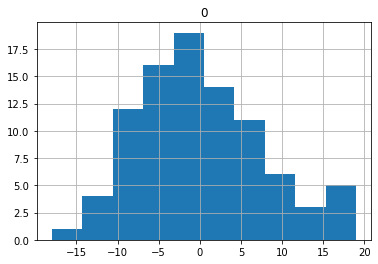

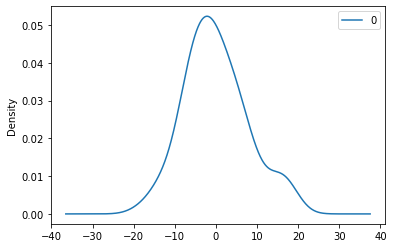

In [28]:
residual_df.hist()
plt.show()
residual_df.plot(kind='kde')
plt.show()

## Residual Q-Q Plot

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.
The values are ordered and compared to an idealized Gaussian distribution. The comparison is
shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match
between the two distributions is shown as a diagonal line from the bottom left to the top-right
of the plot.

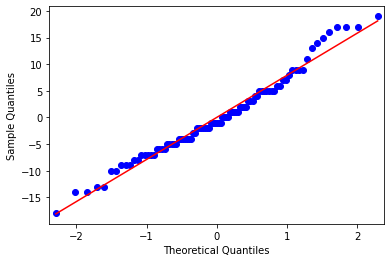

In [37]:
from statsmodels.graphics.gofplots import qqplot

_ = qqplot(np.array(residuals), line='r')
plt.show()

## Residual Autocorrelation Plot

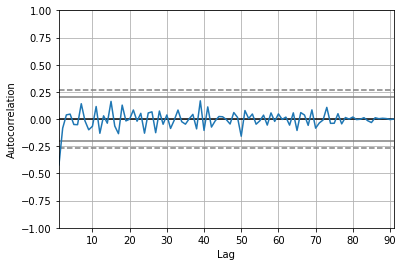

In [40]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(residuals)
plt.show()